<a href="https://colab.research.google.com/github/rnrios/IntroDL/blob/master/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data, training and evaluating model

Imports

In [ ]:
import tensorflow
from tensorflow import keras

Loading dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = dataset.load_data()
train_images.shape

(60000, 28, 28)

Visualizing datasamples

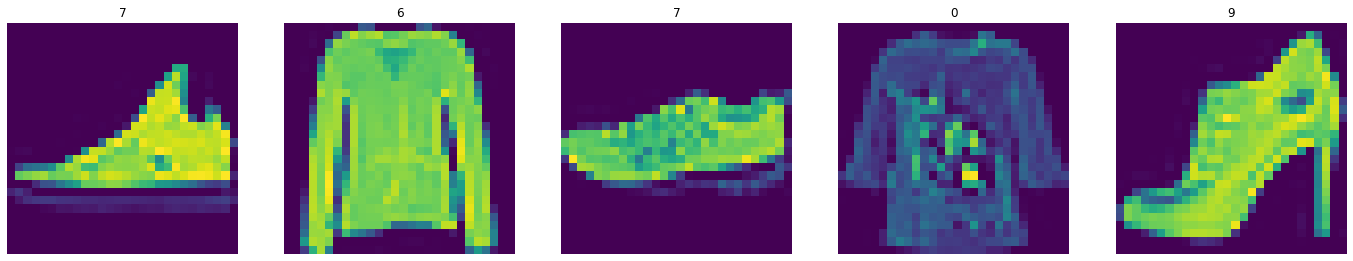

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random

samples = np.random.choice(range(len(train_images)), 5)
plt.figure(figsize=(24,8))
for i, sample in enumerate(samples):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_images[sample])
  plt.title(train_labels[sample])
  plt.axis('off')
plt.show()

Normalizing training images

In [ ]:
train_images = train_images/255.

Training model

In [ ]:
history = model.fit(train_images, train_labels, epochs=4, validation_split=.2, batch_size=32)

Epoch 1/4
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3208 - accuracy: 0.8808 - val_loss: 0.3691 - val_accuracy: 0.8791
Epoch 2/4
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3124 - accuracy: 0.8842 - val_loss: 0.3692 - val_accuracy: 0.8808
Epoch 3/4
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3055 - accuracy: 0.8840 - val_loss: 0.3637 - val_accuracy: 0.8830
Epoch 4/4
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3008 - accuracy: 0.8859 - val_loss: 0.3614 - val_accuracy: 0.8817


Visualizing trained model

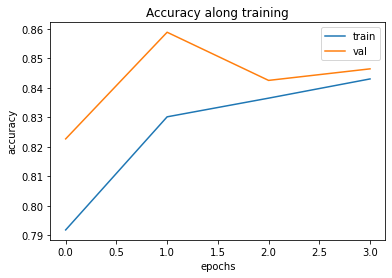

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy along training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

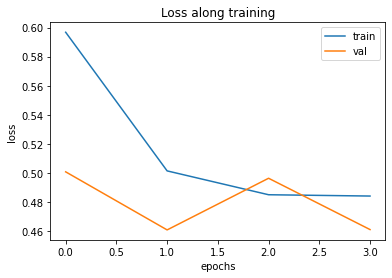

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss along training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Exporting and testing model

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('Loss: ', loss, '\nAccuracy: ', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 91.5913 - accuracy: 0.8280
Loss:  91.59129333496094 
Accuracy:  0.828000009059906


In [ ]:
from tensorflow.keras.models import load_model

model.save('model.h5')
saved_model = load_model('model.h5')
saved_model_test_dataset = saved_model.predict(test_images)
samples = np.random.choice(len(test_images), 5)
for sample in samples:
  print('Test image result: ', np.argmax(saved_model_test_dataset[sample]),
      '\tExpected result: ', test_labels[sample])

Test image result:  6 	Expected result:  6
Test image result:  9 	Expected result:  9
Test image result:  5 	Expected result:  5
Test image result:  0 	Expected result:  0
Test image result:  9 	Expected result:  9


#Model inspection

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_config()

##Zero-initializing weights

In [ ]:
first_dense_layer = model.layers[1].get_weights()
first_weight_layer_shape = first_dense_layer[0].shape
print('Weights shape: {}\tBiases shape: {}'.format(first_dense_layer[0].shape,
                                                    first_dense_layer[1].shape))

Weights shape: (784, 512)	Biases shape: (512,)


In [ ]:
model.layers[1].set_weights([np.zeros(first_dense_layer[0].shape),
                            first_dense_layer[1]])

In [ ]:
#@title Train model
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, validation_split=.2, batch_size=1)

Epoch 1/4
48000/48000 [==============================] - 142s 3ms/step - loss: 0.5926 - accuracy: 0.7921 - val_loss: 0.4647 - val_accuracy: 0.8340
Epoch 2/4
48000/48000 [==============================] - 145s 3ms/step - loss: 0.5055 - accuracy: 0.8270 - val_loss: 0.4719 - val_accuracy: 0.8372
Epoch 3/4
48000/48000 [==============================] - 134s 3ms/step - loss: 0.4923 - accuracy: 0.8379 - val_loss: 0.4698 - val_accuracy: 0.8520
Epoch 4/4
48000/48000 [==============================] - 133s 3ms/step - loss: 0.4805 - accuracy: 0.8423 - val_loss: 0.5122 - val_accuracy: 0.8438


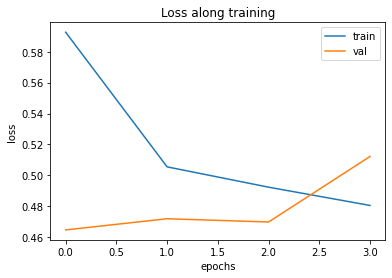

In [ ]:
#@title Evaluate model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss along training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##Random-initializing weights

In [ ]:
model.layers[1].set_weights([np.random.rand(784, 512),
                            first_dense_layer[1]])

In [ ]:
#@title Train model
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, validation_split=.2, batch_size=1)

Epoch 1/4
48000/48000 [==============================] - 144s 3ms/step - loss: 0.5890 - accuracy: 0.7923 - val_loss: 0.4942 - val_accuracy: 0.8272
Epoch 2/4
48000/48000 [==============================] - 134s 3ms/step - loss: 0.5089 - accuracy: 0.8286 - val_loss: 0.5050 - val_accuracy: 0.8223
Epoch 3/4
48000/48000 [==============================] - 144s 3ms/step - loss: 0.4933 - accuracy: 0.8371 - val_loss: 0.4864 - val_accuracy: 0.8322
Epoch 4/4
48000/48000 [==============================] - 142s 3ms/step - loss: 0.4771 - accuracy: 0.8446 - val_loss: 0.4475 - val_accuracy: 0.8592


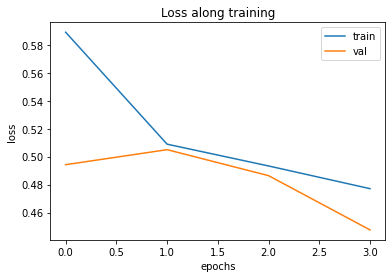

In [ ]:
#@title Evaluate model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss along training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##Zero-initializing biases

In [ ]:
first_dense_layer = model.layers[1].get_weights()
first_weight_layer_shape = first_dense_layer[0].shape
print('Weights shape: {}\tBiases shape: {}'.format(first_dense_layer[0].shape,
                                                    first_dense_layer[1].shape))

Weights shape: (784, 512)	Biases shape: (512,)


In [ ]:
model.layers[1].set_weights([np.zeros(first_dense_layer[0].shape),
                            np.zeros(first_dense_layer[1].shape)])

In [ ]:
#@title Train model
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, validation_split=.2, batch_size=1)

Epoch 1/4
48000/48000 [==============================] - 164s 3ms/step - loss: 0.5957 - accuracy: 0.7919 - val_loss: 0.4728 - val_accuracy: 0.8208
Epoch 2/4
48000/48000 [==============================] - 161s 3ms/step - loss: 0.5026 - accuracy: 0.8272 - val_loss: 0.4745 - val_accuracy: 0.8491
Epoch 3/4
48000/48000 [==============================] - 164s 3ms/step - loss: 0.4927 - accuracy: 0.8351 - val_loss: 0.4410 - val_accuracy: 0.8631
Epoch 4/4
48000/48000 [==============================] - 162s 3ms/step - loss: 0.4804 - accuracy: 0.8403 - val_loss: 0.4883 - val_accuracy: 0.8549


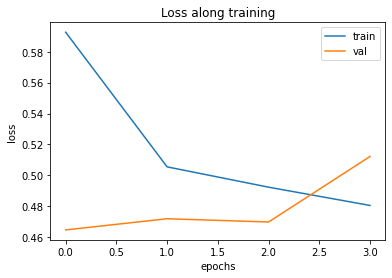

In [ ]:
#@title Evaluate model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss along training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#Exploring hyperparameters

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='model.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True)]

model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=10, 
                    validation_split=.2, 
                    batch_size=1000,
                    callbacks = callbacks)

Epoch 1/10
48/48 [==============================] - 3s 52ms/step - loss: 0.7817 - accuracy: 0.7329 - val_loss: 0.5108 - val_accuracy: 0.8227
Epoch 2/10
48/48 [==============================] - 2s 48ms/step - loss: 0.4899 - accuracy: 0.8317 - val_loss: 0.4459 - val_accuracy: 0.8475
